# Měření rychlosti světla s pomocí tabulky čokolády a mikrovlnky

Značnou část fyziky lze popsat pomocí tří teorií: gravitace, kvantové a relativity. Každá z těchto má jednu ústřední konstantu a to gravitační, Planckovu a rychlost světla. První jmenovanou můžeme snadno vypočíst při znalosti hmotnosti země a měření zrychlení předmětů ve volném pádu. Díky tomu že známe velikost Planckovy konstanty, můžete například číst tento text, nebo rozsvítit bodové LED. V tomto cvičení budeme ovšem měřit poslední konstantu a to rychlost světla.

## Vlna
Vlnou ve fyzice nazýváme jakékoliv řešení následující diferenciální rovnice:

$\frac{1}{c^2}\frac{\partial^2\psi}{\partial t^2}=\frac{\partial^2\psi}{\partial x^2}$

V případě elektro-magnetismu můžeme tuto rovnici odvodit z tzv. Maxwellových rovnic (např. [zde](https://en.wikipedia.org/wiki/Electromagnetic_wave_equation))

Nejčastěji se setkáváme s řešením ve formě takzvané harmonické vlny.

$\psi = A \exp{ i (\vec{k} \vec{r} + \omega  t + \phi_0)}$

Můžeme si všimnout, že tato rovnice má komplexní tvar. Když chceme vypočítat měřitelnou veličinu (intenzitu) musíme vzít absolutní hodnotu, kterou v případě komplexních čísel vypočítáme následovně

$I = \psi \psi^*$,

kde $^*$ značí komplexně sdružené číslo.

### Frekvence a vlnová délka
Tyto dvě veličiny jsou pevně svázané takzvanou disperzní relací. V případě elektromagnetické vlny ve vakuu je disperzní relace lineární (vůči vlnovému číslu, reciproká vůči vlnové délke). Její sklon je určen rychlostí vlny. V případě těchto vln hovoříme o tzv. rychlosti světla. Pokud předchozí věty vyjádříme matematicky dostaneme

$f = \frac{c}{\lambda}$,

kde $c$ označuje právě rychlost vlnění, a $\lambda$ je daná vlnová délka.

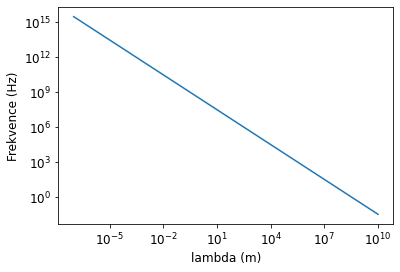

In [1]:
    import matplotlib.pyplot as plt
    plt.rcParams.update({'font.size': 12})
    import numpy as np

    lambda1 = np.logspace(-7,10,200)
    c = 299792458 #m/s
    plt.loglog(lambda1, c/lambda1);
    plt.xlabel('lambda (m)');
    plt.ylabel('Frekvence (Hz)');
    plt.show()

## Součet dvou vln
Teorie šíření elektromagnetických vln je lineární, z čehož plyne, že když se v prostředí šíří více než jedna vlna tak platí princip superpozice. Tento fakt znamená, že abychom našli výslednou intenzitu, musíme sečíst příspěvky od všech vln, které v tomto místě mají nenulovou amplitudu. Následující applet počítá intenzitu vzniklou sečtením dvou protichůdných vln. Prosím vyzkoušejte si jak změna jednotlivých parametrů ovlivní výslednou intenzitu a její chování v čase.

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(lambda1=widgets.IntSlider(min=5, max=20, step=1, value=10, description='lambda1 (cm)'), amp1=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5, description='amp ()'), phi1=widgets.FloatSlider(min=0, max=2*np.pi, step=0.2, value=0, description='Faze1 (rad)'), lambda2=widgets.FloatSlider(min=5, max=20, step=1, value=10, description='lambda2 (cm)'), amp2=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5, description='amp2 ()'), cas=widgets.FloatSlider(min=0, max=10, step=0.5, value=0, description='Cas (us)'))
def intensity(lambda1, amp1, phi1, lambda2, amp2, cas):
    lambda1 = lambda1*1e-2
    lambda2 = lambda2*1e-2
    phi2 = 0
    delka = 0.5
    cas = cas*1e-6
    x = np.linspace(0,delka,200)
    c = 299792458  #m/s
    w1 = 2*np.pi*c/lambda1
    print('Frekvence vlny 1 je: % 3.2f GHz' %(w1*1e-9/2/np.pi))
    w2 = 2*np.pi*c/lambda2
    print('Frekvence vlny 2 je: % 3.2f GHz' %(w2*1e-9/2/np.pi))
    Psi1 = amp1*np.exp(1j*(2*np.pi/lambda1*x + w1*cas + phi1))
    Psi2 = amp2*np.exp(1j*(2*np.pi/lambda2*(-x) + w2*cas + phi2))
    plt.plot(x, abs(((Psi1 + Psi2)*np.conj(Psi1 + Psi2))))
    plt.xlabel('x (m)');
    plt.ylabel('Intenzita ()');
    plt.show()
    return();

interactive(children=(IntSlider(value=10, description='lambda1 (cm)', max=20, min=5), FloatSlider(value=0.5, d…

## Stojaté vlnění
Možná jste si všimli, že pokud zvolíme stejnou vlnovou délku pro obě vlny ($\lambda_1 = \lambda_2$), intenzita se v čase nemění. Přesně tato podmínka je splněna, např. v mikrovlnné troubě. Následující applet dovoluje pouze měnit ty parametry, aby stále byla zachována podmínka pro stojaté vlnění.

In [3]:
@interact(lambda1=widgets.IntSlider(min=5, max=20, step=1, value=10, description='\lambda (cm)'), amp=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5, description='amp ()'), phi=widgets.FloatSlider(min=0, max=2*np.pi, step=0.2, value=0, description='Faze (rad)'), cas=widgets.FloatSlider(min=0, max=10, step=0.5, value=0, description='Cas (us)'))
def intensity(lambda1, amp, phi, cas):
    lambda1 = lambda1*1e-2
    delka = 0.5
    cas = cas*1e-6
    x = np.linspace(0,delka,200)
    c = 299792458  #m/s
    w1 = 2*np.pi*c/lambda1
    print('Frekvence vlny je: % 3.2f GHz' %(w1*1e-9/2/np.pi))
    w2 = 2*np.pi*c/lambda1
    Psi1 = amp*np.exp(1j*(2*np.pi/lambda1*x + w1*cas + phi))
    Psi2 = amp*np.exp(1j*(2*np.pi/lambda1*(-x) + w2*cas))
    plt.plot(x, abs(((Psi1 + Psi2)*np.conj(Psi1 + Psi2))));
    plt.xlabel('x (m)');
    plt.ylabel('Intenzita ()');
    plt.show();
    return();

interactive(children=(IntSlider(value=10, description='\\lambda (cm)', max=20, min=5), FloatSlider(value=0.5, …

Vidíme, že ikdyž měníme všechny ostatní parametry, tak vzdálenost mezi maximy intenzity zůstává stále konstantní. V těchto místech je i lokálně nejvyšší dodaná energie. Tohoto využijeme pro měření vlnové délky mikrovlného vlnění, protože jídlo (nebo v podstatě cokoliv co dáte do mikrovlnné trouby) se nejrychleji zahřeje právě v místech těchto kmiten (nejvyšší intenzity). Více o principu mikrovlnky je v následujícím videu.

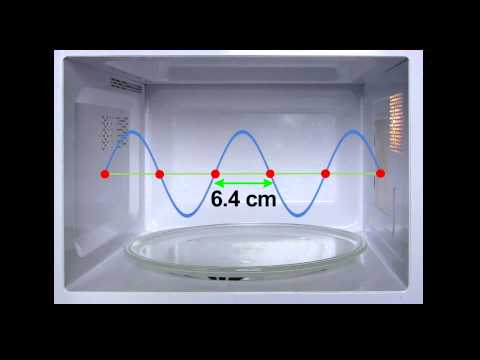

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('kp33ZprO0Ck')

# Zadání experimentu a postup

## Zadání
1. Využijte představené teorie a experimentálně nalezněte rychlost světla. 
2. Pořiďte fotografii talíře s čokoládou a pravítka těsně po ohřevu a vložte ji do protokolu.
2. Porovnejte experimentálně získanou hodnotu se známou hodnotou rychlosti světla. 
3. Odhadněte původ chyby měření.

### K provedení experimentu budeme potřebovat:
- čokoláda ca. 30g,  bez příchutí (čím hořčejší, tím lepší -- zkuste v protokolu zdůvodnit, proč to tak je)
- struhadlo
- lžíce
- talíř 
- mikrovlnnou troubu
- návod od mikrovlnní trouby (někdy stačí i její štítek)
- pravítko
- stojan na čokoládu vhodný do mikrovlnné trouby

**Varování: Ujistěte se pomocí návodu k obsluze mikrovlnky, že všechny předměty, které do mikrovlnky budete vkládat, v ní skutečně můžou být!**

### Postup:
1. V návodu mikrovlnné trouby nebo na jejím štítku nalezneme hodnotu její operační frekvence.
2. Z mikrovlnné trouby vybereme moduly které umožňují otáčení jídla při ohřevu. Je-li to nemožné, ujistíme se, že máme možnost umístit talíř dovnitř mikrovlnky bez toho, aby se při ohřívání jakkoliv pohyboval.
3. Čokoládu nastrouháme a co nejrovnoměji pomocí lžičky rozprostřeme po povrchu talíře.
4. Umístíme talíř s čokoládou do mikrovlnky na nehybný stojan. 
5. Talíř s čokoládu na stojanu necháme ohřívat - pro 83% čokoládu jsme použili ohřívání s výkonem 700 W po dobu 30 s.
6. Po ohřívání talíř s čokoládou vyndáme z mikrovlnky a na čokoládě určíme středy míst, kde se začala topit. Tyto místa budou odpovídat místům s nejvyšší dodanou energií. Fotografii talíře s pravítkem pořídíme co nejrychleji, jinak se může začat postupně topit i další okolí čokolády a výsledky budou zkreslené.

*Tip: jestliže se experiment napoprvé nepodaří, zkuste změnit výšku, ve které se čokoláda nachází - nám nejlépe fungovalo umístit čokoládu výš než vlnovod, který přenáší vlny ze zdroje dovnitř mikrovlnky.*